In [1]:
import pandas as pd
import numpy as np
import re
from scipy.cluster import hierarchy as hac
import matplotlib.pyplot as plt

In [2]:
with open('data.tsv', 'r', 100000000) as t:
    lines = t.read().splitlines()
    
print(len(lines))

dt = pd.DataFrame(lines)
print(dt.shape)

30531310
(30531310, 1)


In [3]:
# data = pd.read_table('data.tsv', sep='\n', header = None)
# print(data)
labels = pd.read_table('labels.tsv', header = None, error_bad_lines = False)
# print(labels)
full_data = pd.concat([dt,labels], axis = 1)
full_data.columns =['Data','Labels']

In [4]:
voc_dict = {}
voc_dict_inv = {}
i = 0
with open('vocab.bpe.from','r') as f:
    keys = f.read().splitlines()
    for key in keys:
        if i>2 :
            voc_dict[i-3] = key
            voc_dict_inv[key] = i-3            
#             print(key)
        i+=1
print(i)

15003


In [5]:
with open('labels.tsv','r') as l:
    ls = l.read().splitlines()
    label_names = list(set(ls))
        
# print(label_names)

labels_dict = {}
labels_dict_inv = {}
for i, label_name in enumerate(label_names):
    labels_dict[i] = label_name
    labels_dict_inv[label_name] = i

print(len(labels_dict))
# print(labels_dict_inv)

33103


In [6]:
subredditsXvocwords = np.zeros([33103,15000])

In [7]:
for i, (comment, label) in enumerate(zip(lines,ls)):
    words = comment.split(' ')
    for w in words:
        if w =='':
            print(i)
        else:
            subredditsXvocwords[labels_dict_inv[label], voc_dict_inv[w]] += 1
print(i)

4323341
6997534
7689725
9673259
17197799
28094605
30531309


# Tfidf

In [9]:
total_number_of_documents = 33103
vocwordsXsubreddits = np.transpose(subredditsXvocwords)
words_per_subreddit = np.sum(vocwordsXsubreddits, axis = 0)
tf = vocwordsXsubreddits/words_per_subreddit
subreddits_per_word = np.count_nonzero(vocwordsXsubreddits, axis = 1)
idf = subreddits_per_word/total_number_of_documents
tf_idf = np.transpose(tf)*np.transpose(idf) #
tf_idf = np.transpose(tf_idf)
print('Συνηθισμένος πίνακας tfidf : term - document(subreddit)')
print(tf_idf.shape)

Συνηθισμένος πίνακας tfidf : term - document(subreddit)
(15000, 33103)


# Clustering & δενδρόγραμμα με μερικά subreddits

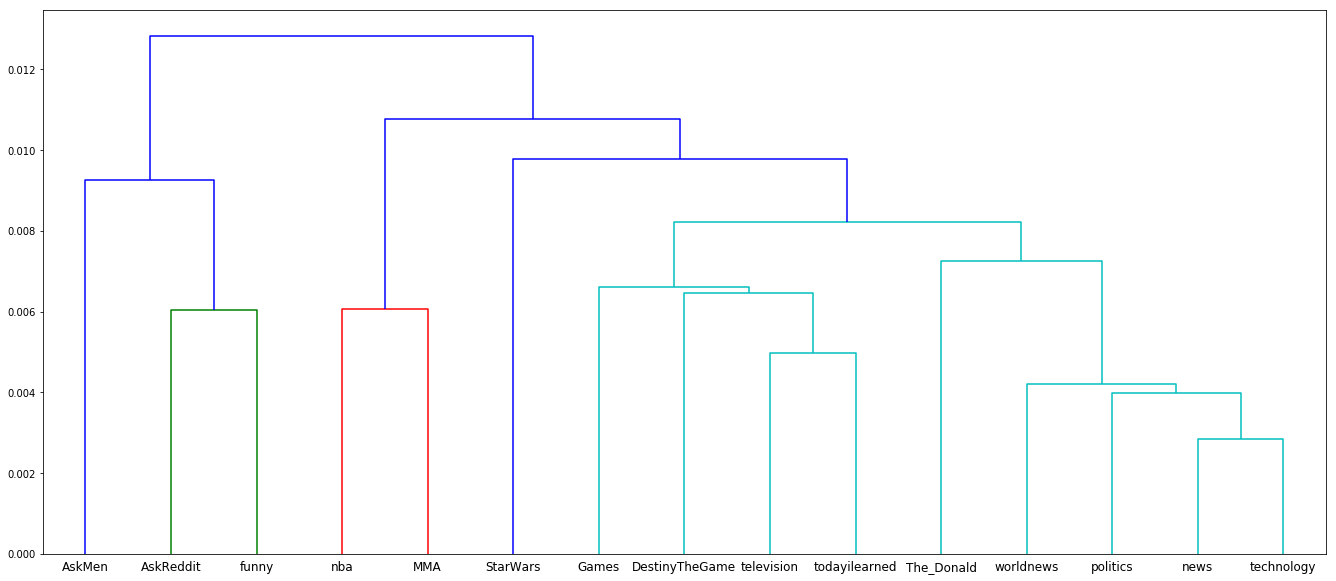

In [11]:
subreddits4submatrix = ['AskMen', 'StarWars', 'AskReddit', 'DestinyTheGame', 'Games', 'funny', 'nba', 'news', 'politics',
                        'technology', 'television', 'todayilearned', 'worldnews', 'MMA', 'The_Donald' ]
obs_per_subreddit = np.zeros([15,15000])
t = np.transpose(tf_idf)
for j, s in enumerate(subreddits4submatrix):
    obs_per_subreddit[j,:] = t[labels_dict_inv[s],:]
    
z = hac.linkage(obs_per_subreddit, method = 'average')

plt.figure(figsize=(23, 10))
d = hac.dendrogram(z, labels = subreddits4submatrix)